# Teoría del Aprendizaje Computacional - Trabajo Práctico N° 4
El presente notebook contiene los enunciados correspondientes a los distintos ejercicios que conforman este trabajo práctico.

Este formato resulta muy conveniente para incorporar código, agregando una adecuada documentación que acompañe cada etapa del proceso de resolución.

# Ejercicio N° 1

Trabajaremos sobre un conjunto de datos ya conocido, que trabajamos en el TP N° 2:

> "iris" - Formato: npy

El archivo correspondiente se encuentra en la carpeta datasets que acompaña este notebook. Puede cargarlo en un arreglo de numpy, por ejemplo, así:

`iris = np.load('iris.npy')`

El conjunto de datos "Iris" ha sido usado como caso de prueba para una gran cantidad de clasificadores y es, quizás, el conjunto de datos más conocido de la literatura específica. Iris es una variedad de planta que se la desea clasificar de acuerdo a su tipo.

<center><img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" alt="drawing" width="500"/></center>

Se reconocen tres tipos distintos: *Iris setosa*, *Iris versicolor* e *Iris virgínica*. El objetivo es lograr clasificar una planta de la variedad Iris a partir del largo y del ancho del pétalo y del largo y del ancho del sépalo.

El conjunto de datos Iris está formado en total por 150 muestras, siendo 50 de cada uno de los tres tipos de plantas. Cada muestra está compuesta por el tipo de planta (`0: 'setosa', 1: 'versicolor', 2: 'virginica'`), la longitud y ancho del pétalo, y la longitud y ancho del sépalo. Todos son atributos numéricos continuos.

En esta oportunidad se pide realizar aprendizaje no supervisado, por lo que no vamos a utilizar las etiquetas que tenemos en las muestras, utilizaremos sólo los atributos (la longitud y ancho del pétalo, y la longitud y ancho del sépalo).

Se solicita utilizar el módulo `cluster` de `sklearn` para construir, en este caso, un agrupamiento utilizando el algoritmo k-means.

Aplique el proceso de agrupamiento presentado en la teoría y en el ejemplo de aplicación.

Dado que en este caso dispone de la etiqueta (cosa no frecuente en aprendizaje no supervisado) reporte a qué *cluster* se asigna cada muestra y a qué especie pertenece en efecto la muestra original. Puede, si lo desea, construir una matriz de confusión.

In [ ]:
import numpy as npy

iris_npy = npy.load("/content/iris.npy")
print("El shape del dataset es " + str(iris_npy.shape))
print(str(iris_npy.shape[0]) + " muestras con " + str(iris_npy.shape[1]) + " columnas.\n")
print(iris_npy[0:10])

El shape del dataset es (150, 5)
150 muestras con 5 columnas.

[[0.  5.1 3.5 1.4 0.2]
 [0.  4.9 3.  1.4 0.2]
 [0.  4.7 3.2 1.3 0.2]
 [0.  4.6 3.1 1.5 0.2]
 [0.  5.  3.6 1.4 0.2]
 [0.  5.4 3.9 1.7 0.4]
 [0.  4.6 3.4 1.4 0.3]
 [0.  5.  3.4 1.5 0.2]
 [0.  4.4 2.9 1.4 0.2]
 [0.  4.9 3.1 1.5 0.1]]


Convertimos el arreglo a un dataframe de pandas para realizar un análisis superficial:

In [ ]:
import pandas as pds

iris_df = pds.DataFrame(iris_npy)
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [ ]:
iris_df.describe()

,0,1,2,3,4
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.000000,5.843333,3.057333,3.758000,1.199333
std,0.819232,0.828066,0.435866,1.765298,0.762238
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,0.000000,5.100000,2.800000,1.600000,0.300000
50%,1.000000,5.800000,3.000000,4.350000,1.300000
75%,2.000000,6.400000,3.300000,5.100000,1.800000
max,2.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
print("Distribución de muestras:\n")
print(iris_df[0].value_counts())

Distribución de muestras:

0
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64


A simple vista se observa:

*   No hay muestras con valores nulos
*   Hay 150 muestras como se estipuló en el enunciado
*   Todos los atributos son de tipo punto flotante en su totalidad
*   El dataset se encuentra perfectamente distribuído en 50 muestras de cada tipo.

Pasemos a buscar valores fuera de rango en cada atributo/columna del dataset (excepto la primera, que es categórica):

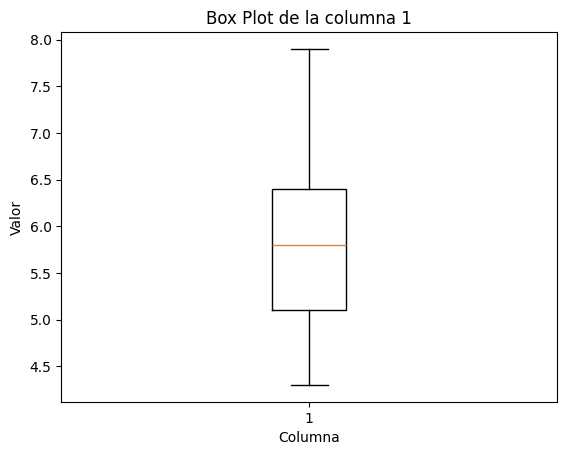

In [ ]:
import matplotlib.pyplot as plt

def boxplot(dataframe, column_number):
  plt.boxplot(dataframe[column_number])
  plt.xlabel('Columna')
  plt.ylabel('Valor')
  plt.title('Box Plot de la columna ' + str(column_number))


boxplot(iris_df, 1)

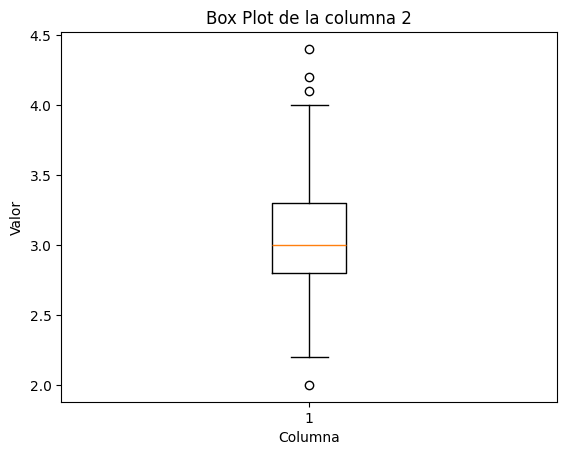

In [ ]:
boxplot(iris_df, 2)

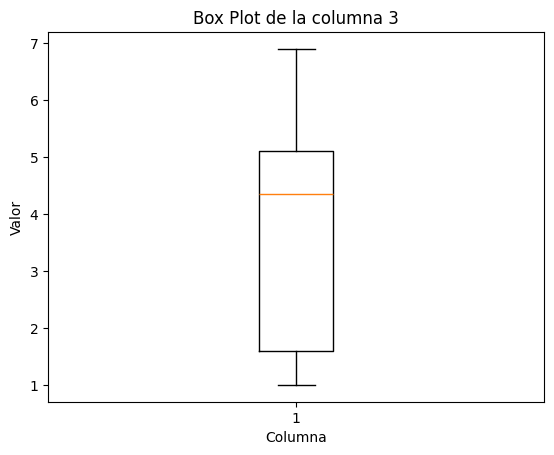

In [ ]:
boxplot(iris_df, 3)

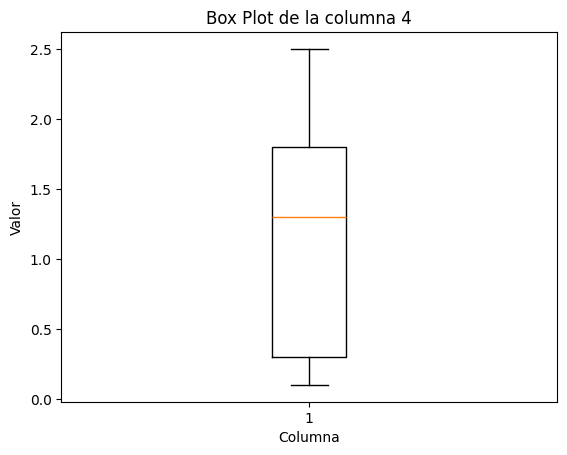

In [ ]:
boxplot(iris_df, 4)

Vemos que el único atributo que presenta valores fuera de rango es el 2 y parecieran ser 4 muestras. Identifiquemos los valores y las muestras que lo contienen y definamos si son leves o extremos:

Primero definimos una función para obtener los intervalos dentro de los que se encuentran los valores fuera de rango leves.

In [331]:
#Esta función será también utilizada en el resto de las resoluciones
def rangosOutliersLeves(dataframe):

  intervalos_outliers_leves = npy.empty(shape=(len(dataframe.columns), 2, 2))

  for column in dataframe:

    intervalo_superior = npy.empty(shape=(2,), dtype=float)
    intervalo_inferior = npy.empty(shape=(2,), dtype=float)

    primer_cuartil = dataframe[column].quantile(0.25)
    tercer_cuartil = dataframe[column].quantile(0.75)
    rango_intercuartil = tercer_cuartil - primer_cuartil

    intervalo_inferior[0] = primer_cuartil - 3 * rango_intercuartil
    intervalo_inferior[1] = primer_cuartil - 1.5 * rango_intercuartil

    intervalo_superior[0] = tercer_cuartil + 1.5 * rango_intercuartil
    intervalo_superior[1] = tercer_cuartil + 3 * rango_intercuartil

    print("Intervalos de outliers leves de la columna "+ str(column) +": " +
          "[" + str(intervalo_inferior[0]) + ", " + str(intervalo_inferior[1]) + ") , " +
          "(" + str(intervalo_superior[0]) + ", " + str(intervalo_superior[1]) + "]")

    column_index = dataframe.columns.get_loc(column)

    intervalos_outliers_leves[column_index, 0, 0] = intervalo_inferior[0]
    intervalos_outliers_leves[column_index, 0, 1] = intervalo_inferior[1]

    intervalos_outliers_leves[column_index, 1, 0] = intervalo_superior[0]
    intervalos_outliers_leves[column_index, 1 ,1] = intervalo_superior[1]

  return intervalos_outliers_leves

Y luego una función para obtener las muestras con los valores fuera de rango según los atributos/columnas elegidos.

In [332]:

'''
Retorna un dataframe con todas las muestras con al menos un atributo con
un valor fuera de rango leve
'''
def getOutliersLevesDataframe(dataframe, intervalos, columns_to_ignore):

  outliers_df = pds.DataFrame(columns=dataframe.columns)

  for column in dataframe:
    if column not in columns_to_ignore:
      column_index = dataframe.columns.get_loc(column)

      column_outliers_df = dataframe[
                      ((dataframe[column] >= intervalos[column_index, 0, 0]) &
                      (dataframe[column] < intervalos[column_index, 0, 1])) |
                      ((dataframe[column] > intervalos[column_index, 1, 0]) &
                      (dataframe[column] <= intervalos[column_index, 1, 1]))]
      outliers_df = pds.concat([outliers_df, column_outliers_df])

  #La concatenación no ignora los valores duplicados
  outliers_df = outliers_df.drop_duplicates()
  print(outliers_df)
  print("Total de outliers leves: " + str(len(outliers_df)))
  return outliers_df


'''
Retorna un dataframe con todas las muestras con al menos un atributo con un
valor fuera de rango extremo
'''
def getOutliersExtremosDataframe(dataframe, intervalos, columns_to_ignore):

  outliers_df = pds.DataFrame(columns=dataframe.columns)

  for column in dataframe:
    if column not in columns_to_ignore:
      column_index = dataframe.columns.get_loc(column)

      column_outliers_df = dataframe[
                          (dataframe[column] < intervalos[column_index, 0, 0]) |
                          (dataframe[column] > intervalos[column_index, 1, 1])]
      outliers_df = pds.concat([outliers_df, column_outliers_df])

  #La concatenación no ignora los valores duplicados
  outliers_df = outliers_df.drop_duplicates()
  print(outliers_df)
  print("Total de outliers extremos: " + str(len(outliers_df)))
  return outliers_df


Con esto obtenemos los intervalos:

In [ ]:
intervalos_iris = rangosOutliersLeves(iris_df)

Intervalos de outliers leves de la columna 0: [-6.0, -3.0) , (5.0, 8.0]
Intervalos de outliers leves de la columna 1: [1.1999999999999975, 3.1499999999999986) , (8.350000000000001, 10.300000000000002]
Intervalos de outliers leves de la columna 2: [1.2999999999999998, 2.05) , (4.05, 4.8]
Intervalos de outliers leves de la columna 3: [-8.899999999999999, -3.649999999999999) , (10.349999999999998, 15.599999999999998]
Intervalos de outliers leves de la columna 4: [-4.2, -1.95) , (4.05, 6.3]


Y obtenemos las muestras ignorando todas las columnas excepto la 2:

In [ ]:
getOutliersLevesDataframe(iris_df, intervalos_iris, [0,1,3,4])
print("")
getOutliersExtremosDataframe(iris_df, intervalos_iris, [0,1,3,4])

      0    1    2    3    4
15  0.0  5.7  4.4  1.5  0.4
32  0.0  5.2  4.1  1.5  0.1
33  0.0  5.5  4.2  1.4  0.2
60  1.0  5.0  2.0  3.5  1.0
Total de outliers leves: 4

Empty DataFrame
Columns: [0, 1, 2, 3, 4]
Index: []
Total de outliers extremos: 0


<ipython-input-21-aabaaa636eec>:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers_df = pds.concat([outliers_df, column_outliers_df])


,0,1,2,3,4


Vemos que efectivamente son solo 4 muestas y son todas leves:

*   Muestras 32 y 60: La diferencia entre el límite del intervalo de valores fuera de rango leves y el valor del atributo es de 0.05 para ambos, muy poca incluso en este contexto. Se pueden reemplazar por el valor mas cercano que no sea fuera de rango.
*   Muestras 15 y 33: En estos casos la diferencia es un poco mas (0.35 y 0.15 respectivamente) y solo se trata de 2 muestras en un total de 150 con una distribución uniforme, por lo que pueden descartarse sin problema.



Cambiamos los valores de las muestras 32 y 60:

In [ ]:
print("Muestra 32 antes del cambio:")
print(iris_df.iloc[32])

iris_df.iloc[32,2] = 4.05
print("\nMuestra 32 despues del cambio")
print(iris_df.iloc[32])

Muestra 32 antes del cambio:
0    0.0
1    5.2
2    4.1
3    1.5
4    0.1
Name: 32, dtype: float64

Muestra 32 despues del cambio
0    0.00
1    5.20
2    4.05
3    1.50
4    0.10
Name: 32, dtype: float64


In [ ]:
print("Muestra 60 antes del cambio:")
print(iris_df.iloc[60])

iris_df.iloc[60,2] = 2.05
print("\nMuestra 60 despues del cambio")
print(iris_df.iloc[60])

Muestra 60 antes del cambio:
0    1.0
1    5.0
2    2.0
3    3.5
4    1.0
Name: 60, dtype: float64

Muestra 60 despues del cambio
0    1.00
1    5.00
2    2.05
3    3.50
4    1.00
Name: 60, dtype: float64


Y descartamos las otras dos:

In [ ]:
iris_df = iris_df.drop(15)
iris_df = iris_df.drop(33)
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       148 non-null    float64
 1   1       148 non-null    float64
 2   2       148 non-null    float64
 3   3       148 non-null    float64
 4   4       148 non-null    float64
dtypes: float64(5)
memory usage: 6.9 KB


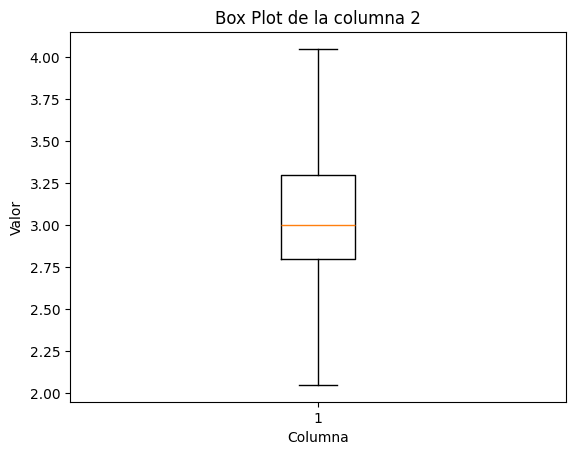

In [ ]:
boxplot(iris_df, 2)

Vemos que ya no encontramos valores fuera de rango para este atributo.

Finalmente, para terminar el pre-procesado escalamos los datos. Como ya no contamos con valores fuera de rango podemos utilizar algo como StandardScaler.

In [ ]:
print("Antes del escalado con StandardSCaler:")
iris_df.describe()

Antes del escalado con StandardSCaler:


,0,1,2,3,4
count,148.000000,148.000000,148.000000,148.000000,148.000000
mean,1.013514,5.846622,3.040541,3.789189,1.211486
std,0.816384,0.833109,0.411995,1.756470,0.760015
min,0.000000,4.300000,2.050000,1.000000,0.100000
25%,0.000000,5.100000,2.800000,1.600000,0.300000
50%,1.000000,5.800000,3.000000,4.400000,1.300000
75%,2.000000,6.400000,3.300000,5.100000,1.800000
max,2.000000,7.900000,4.050000,6.900000,2.500000


In [ ]:
from sklearn.preprocessing import StandardScaler

iris_df.iloc[:, [1,2,3]] = StandardScaler().fit_transform(iris_df.iloc[:, [1,2,3]])

print("Luego del escalado con StandardSCaler:")
iris_df.describe()

Luego del escalado con StandardSCaler:


,0,1,2,3,4
count,148.000000,1.480000e+02,1.480000e+02,1.480000e+02,148.000000
mean,1.013514,-1.968395e-15,-2.832569e-15,-1.488299e-15,1.211486
std,0.816384,1.003396e+00,1.003396e+00,1.003396e+00,0.760015
min,0.000000,-1.862750e+00,-2.412418e+00,-1.593343e+00,0.100000
25%,0.000000,-8.992306e-01,-5.858259e-01,-1.250589e+00,0.300000
50%,1.000000,-5.615105e-02,-9.873470e-02,3.489298e-01,1.300000
75%,2.000000,6.664886e-01,6.319021e-01,7.488095e-01,1.800000
max,2.000000,2.473088e+00,2.458494e+00,1.777072e+00,2.500000


Ahora pasamos a seleccionar las columnas relevantes para el proceso de clustering: En este caso todas excepto la primera que es la de tipo.



In [ ]:
iris_attributes_df = iris_df.iloc[:,1:]
iris_attributes_df

,1,2,3,4
0,-0.899231,1.118993,-1.364840,0.2
1,-1.140110,-0.098735,-1.364840,0.2
2,-1.380990,0.388357,-1.421966,0.2
3,-1.501430,0.144811,-1.307715,0.2
4,-1.019671,1.362539,-1.364840,0.2
...,...,...,...,...
145,1.027808,-0.098735,0.805935,2.3
146,0.546049,-1.316463,0.691684,1.9
147,0.786928,-0.098735,0.805935,2.0
148,0.425609,0.875448,0.920187,2.3


Definimos el objeto KMeans con el número de clusters predeterminado en 3 (debido a que en este caso sabemos que son 3 clases) y un random_state inicial de 10:

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


c = KMeans(n_clusters=3, random_state=10)
c.fit(iris_attributes_df)

KMeans(n_clusters=3, random_state=10)

Y ejecutamos el algoritmo:

In [ ]:
c_clusters = c.predict(iris_attributes_df)
c_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

Observemos a simple vista las etiquetas originales para comparar:




In [ ]:
print(iris_df[0].ravel())

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2.]


<ipython-input-110-82ca7394c617>:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  print(iris_df[0].ravel())


Vemos que el desempeño fue bastante malo. Probemos nuevamente con un random_state diferente:

In [ ]:
c = KMeans(n_clusters=3, random_state=5)
c.fit(iris_attributes_df)
c_clusters = c.predict(iris_attributes_df)
c_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

Esta vez se obtuvieron resultados mucho mejores.
Ahora que tenemos un conjunto de resultados aceptables, pasemos a graficar el scatter plot para compararlo de forma gráfica. Hay que señalar que estamos trabajando con 4 dimensiones, por lo que solo se elegirán el largo del pétalo y del sépalo para poder realizar los gráficos en dos dimensiones:

[]

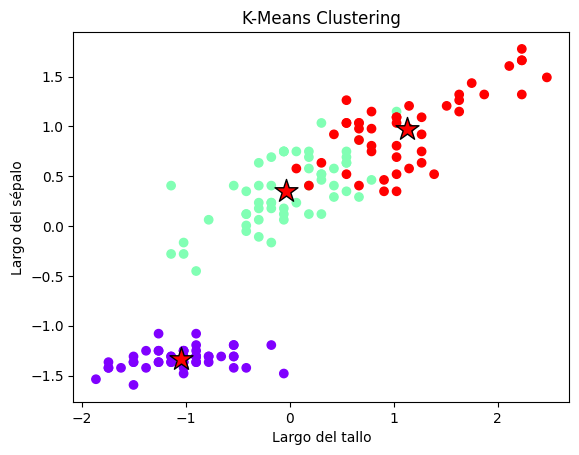

In [ ]:
plt.figure()

# Visualizamos los patrones...
plt.scatter(iris_attributes_df.iloc[:,0], iris_attributes_df.iloc[:,2], c=c_clusters, cmap='rainbow')

# Visualizamos los centroides...
plt.scatter(
    c.cluster_centers_[:, 0],
    c.cluster_centers_[:, 2],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.title("K-Means Clustering")
plt.xlabel("Largo del tallo")
plt.ylabel("Largo del sépalo")
plt.plot()

<ipython-input-114-1f6bca65486d>:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plt.scatter(iris_df.iloc[:,1], iris_df.iloc[:,3], c=iris_df[0].ravel(), cmap='rainbow')


[]

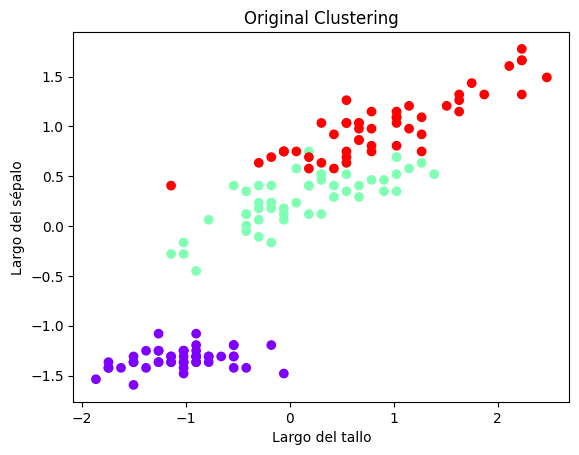

In [ ]:
plt.scatter(iris_df.iloc[:,1], iris_df.iloc[:,3], c=iris_df[0].ravel(), cmap='rainbow')
plt.title("Original Clustering")
plt.xlabel("Largo del tallo")
plt.ylabel("Largo del sépalo")
plt.plot()

Por lo menos respecto a estos dos atributos podemos observar que el modelo tuvo un desempeño muy bueno, teniendo dificultad solo en el solapamiento visto entre dos clases.

# Ejercicio N° 2

Trabajaremos nuevamente con otro dataset conocido: la base de datos de dígitos manuscritos MNIST es un buen ejemplo de un conjunto de datos del mundo real que no requiere que uno se preocupe por el preprocesamiento de los mismos para comenzar a trabajar en su clasificación.

<center>
    <img src="https://miro.medium.com/max/424/0*jKObdo7pFVcJ-Kwd.png" alt="drawing"/>
</center>

Esta base de datos cuenta con un conjunto de dígitos manuscritos producidos por una gran cantidad de personas diferentes. Estos dígitos han sido escaneados a partir de documentos impresos, y los dígitos han sido centrados y escalados a un tamaño de 28x28 pixeles usando 256 tonos de grises, de forma de hacerlos comparables entre ellos. Para este ejercicio, se cuenta con un subconjunto de la base de datos original, compuesto por 5000 patrones de entrenamiento y 1000 patrones independientes para validar la clasificación.

En esta oportunidad se pide realizar aprendizaje no supervisado, por lo que no vamos a utilizar las etiquetas que tenemos en las muestras, utilizaremos sólo los atributos (las imágenes correspondientes a los dígitos).

Se solicita:

* Utilizar el módulo `cluster` de `sklearn` para construir, en este caso, 10 clusters utilizando el algoritmo aglomerativo.

* Realice 3 ejecuciones independientes de clustering aglomerativo con criterio de vinculación "complete", utilizando afinidad: "euclidean", "manhattan" y "cosine", mostrando en cada caso 16 ejemplos aleatorios de cada cluster.

Nota: este ejercicio tiene un archivo de datos relacionado, denominado mnistabridged.npz, encuéntrelo en la carpeta "datasets" de archivos suplementarios de la actividad. Puede cargarlos en arreglos de numpy, por ejemplo, así:

```
import numpy as np

datos = np.load('mnistabridged.npz')

train_data = datos['train_data']
train_labels = datos['train_labels']
test_data = datos['test_data']
test_labels = datos['test_labels']
```

Se sugiere unirlos para quedarnos con un único conjunto de muestras y etiquetas, es decir, utilice todas las muestras para formar los clusters.

In [ ]:
import numpy as np

datos = np.load('/content/mnistabridged.npz')

train_data = datos['train_data']
train_labels = datos['train_labels']
test_data = datos['test_data']
test_labels = datos['test_labels']

Unimos ambos pares de conjuntos en uno solo de datos y uno solo de resultados:

In [ ]:
numeros_data_npy = np.vstack((train_data, test_data))

numeros_labels_npy = np.vstack((train_labels, test_labels))


Según lo indica el enunciado, no es necesario trabajar en el pre-procesado de este conjunto de datos, pero lo que si hay que hacer por lo menos es escalar los atributos para mejorar el desempeño del modelo. Para escalar podríamos utilizar minmax_scale para dejar los valores en el rango de 0 a 1, pero en este caso es mucho mas sencillo dividir todos los valores del arreglo por 255:

In [ ]:
numeros_data_npy = numeros_data_npy/255

Finalmente vale la pena revisar también la proporción de muestras para anticipar la presencia de algún sesgo:

In [ ]:
def count_npy_uniques(array):
  classes, counts = np.unique(array, return_counts=True)
  for i in range(len(classes)):
    print("[" + str(classes[i]) + "]: " + str(counts[i]))

print("Muestras de entrenamiento: ")
count_npy_uniques(numeros_labels_npy)

Muestras de entrenamiento: 
[0]: 564
[1]: 689
[2]: 604
[3]: 600
[4]: 645
[5]: 521
[6]: 588
[7]: 649
[8]: 551
[9]: 589


El dataset se encuentra bastante balanceado, por lo que si se produce un sesgo a partir de estas proporciones el mismo será mínimo.

A continuación pasamos a preparar el algoritmo de clustering. Se utilizarán 10 clusters predefinidos y una estrategia de distancia completa según lo estipulado en el enunciado.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=10, linkage='complete')

Definimos desde un principio las matrices de distancia según las tres métricas también estipuladas en el enunciado: euclideana, manhattan y cosine.

In [ ]:
from scipy.spatial.distance import cdist

euclidean_distance_matrix = cdist(numeros_data_npy, numeros_data_npy, metric='euclidean')
manhattan_distance_matrix = cdist(numeros_data_npy, numeros_data_npy, metric="cityblock")
cosine_distance_matrix = cdist(numeros_data_npy, numeros_data_npy, metric="cosine")

Finalmente ejecutamos el algoritmo en orden, una vez para cada matriz de distancias, y extraemos 16 muestras al azar de cada una al finalizar cada ejecución.

In [ ]:
clustering.fit(euclidean_distance_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:586: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


AgglomerativeClustering(linkage='complete', n_clusters=10)

In [ ]:
def getExamples(clustering_labels, samples, original_labels):
  for cluster_num in np.unique(clustering_labels):
    print(f"Cluster {cluster_num}")
    indices = np.where(clustering_labels == cluster_num)[0]
    random_indices = np.random.choice(indices, size=16, replace=False)
    for index in random_indices:
      #print("Muestra: ")
      #print(samples[index])
      print("Etiqueta original: " + str(original_labels[index]))
    print("\n")
  return



In [ ]:
#Distancia euclideana

labels = clustering.labels_

getExamples(labels, numeros_data_npy, numeros_labels_npy)

Cluster 0
Etiqueta original: [2]
Etiqueta original: [3]
Etiqueta original: [4]
Etiqueta original: [7]
Etiqueta original: [9]
Etiqueta original: [3]
Etiqueta original: [7]
Etiqueta original: [5]
Etiqueta original: [9]
Etiqueta original: [7]
Etiqueta original: [6]
Etiqueta original: [8]
Etiqueta original: [2]
Etiqueta original: [4]
Etiqueta original: [7]
Etiqueta original: [0]


Cluster 1
Etiqueta original: [0]
Etiqueta original: [0]
Etiqueta original: [0]
Etiqueta original: [0]
Etiqueta original: [0]
Etiqueta original: [0]
Etiqueta original: [0]
Etiqueta original: [0]
Etiqueta original: [0]
Etiqueta original: [0]
Etiqueta original: [0]
Etiqueta original: [0]
Etiqueta original: [0]
Etiqueta original: [0]
Etiqueta original: [0]
Etiqueta original: [0]


Cluster 2
Etiqueta original: [5]
Etiqueta original: [8]
Etiqueta original: [8]
Etiqueta original: [3]
Etiqueta original: [2]
Etiqueta original: [8]
Etiqueta original: [5]
Etiqueta original: [8]
Etiqueta original: [8]
Etiqueta original: [5]


In [ ]:
#Distancia manhattan

clustering.fit(manhattan_distance_matrix)

labels = clustering.labels_

getExamples(labels, numeros_data_npy, numeros_labels_npy)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:586: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


Cluster 0
Etiqueta original: [5]
Etiqueta original: [3]
Etiqueta original: [3]
Etiqueta original: [0]
Etiqueta original: [7]
Etiqueta original: [0]
Etiqueta original: [6]
Etiqueta original: [2]
Etiqueta original: [0]
Etiqueta original: [6]
Etiqueta original: [0]
Etiqueta original: [8]
Etiqueta original: [2]
Etiqueta original: [6]
Etiqueta original: [3]
Etiqueta original: [0]


Cluster 1
Etiqueta original: [0]
Etiqueta original: [3]
Etiqueta original: [6]
Etiqueta original: [0]
Etiqueta original: [6]
Etiqueta original: [0]
Etiqueta original: [4]
Etiqueta original: [0]
Etiqueta original: [7]
Etiqueta original: [0]
Etiqueta original: [8]
Etiqueta original: [6]
Etiqueta original: [3]
Etiqueta original: [0]
Etiqueta original: [0]
Etiqueta original: [8]


Cluster 2
Etiqueta original: [2]
Etiqueta original: [9]
Etiqueta original: [1]
Etiqueta original: [1]
Etiqueta original: [9]
Etiqueta original: [7]
Etiqueta original: [4]
Etiqueta original: [7]
Etiqueta original: [1]
Etiqueta original: [3]


In [ ]:
#Distancia cosine

clustering.fit(cosine_distance_matrix)

labels = clustering.labels_

getExamples(labels, numeros_data_npy, numeros_labels_npy)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:586: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


Cluster 0
Etiqueta original: [7]
Etiqueta original: [1]
Etiqueta original: [1]
Etiqueta original: [2]
Etiqueta original: [1]
Etiqueta original: [1]
Etiqueta original: [1]
Etiqueta original: [1]
Etiqueta original: [1]
Etiqueta original: [2]
Etiqueta original: [3]
Etiqueta original: [9]
Etiqueta original: [5]
Etiqueta original: [1]
Etiqueta original: [1]
Etiqueta original: [1]


Cluster 1
Etiqueta original: [5]
Etiqueta original: [5]
Etiqueta original: [0]
Etiqueta original: [5]
Etiqueta original: [2]
Etiqueta original: [8]
Etiqueta original: [5]
Etiqueta original: [0]
Etiqueta original: [0]
Etiqueta original: [0]
Etiqueta original: [7]
Etiqueta original: [9]
Etiqueta original: [5]
Etiqueta original: [0]
Etiqueta original: [7]
Etiqueta original: [5]


Cluster 2
Etiqueta original: [5]
Etiqueta original: [7]
Etiqueta original: [5]
Etiqueta original: [4]
Etiqueta original: [4]
Etiqueta original: [7]
Etiqueta original: [4]
Etiqueta original: [9]
Etiqueta original: [9]
Etiqueta original: [9]


Podemos ver en los tres métodos de clustering que el algoritmo identificó algún patrón y segregó las muestras acorde al mismo, pero el nivel de coincidencia con respecto a las etiquetas originales es muy bajo.
Estos ejemplos demuestran la enorme diferencia que hay con respecto a usar redes neuronales bajo entrenamiento supervisado.

# Ejercicio 3

Seleccione algún dataset de su interés (los paquetes de código como `sklearn` suelen incluir varios, pero también hay una gran cantidad en diversos repositorios de internet, incluso provistos por gobiernos) y aplique aprendizaje no supervisado utilizando por lo menos 2 algoritmos de *clustering* distintos.

<center>
<a href="https://datosabiertos.desarrollosocial.gob.ar/dataset/">
<image src="https://pbs.twimg.com/media/EzsGb1BXMAEIf51.jpg" width="500" height="250"></image>
</a>
</center>

Documente las pruebas, los resultados y conclusiones que obtenga.

In [286]:
import pandas as pd

compras_df = pd.read_csv('/content/compra-covid-2021-12-30.csv')

In [ ]:
compras_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 26 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   id                                                       761 non-null    int64  
 1   numero_cotratacion                                       761 non-null    object 
 2   expediente                                               761 non-null    object 
 3   proceso_comprar                                          761 non-null    object 
 4   objeto                                                   761 non-null    object 
 5   moneda                                                   761 non-null    object 
 6   monto_adjudicado                                         761 non-null    int64  
 7   cantidad_de_invitados                                    761 non-null    int64  
 8   oferente_razon_social         

In [263]:
compras_df.describe()

,id,monto_adjudicado,cantidad_de_invitados,oferente_cuit,oferente_monto_ofrecido,oferente_cantidad_adjudicado_monto,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,761.000000,7.610000e+02,761.000000,7.610000e+02,7.610000e+02,6.470000e+02,0.0,0.0,0.0
mean,381.000000,1.308284e+08,793.081472,3.032267e+10,3.756551e+07,1.535268e+07,NaN,NaN,NaN
std,219.826068,1.930569e+08,181.190351,2.432346e+09,5.381315e+07,4.389429e+07,NaN,NaN,NaN
min,1.000000,0.000000e+00,6.000000,2.004298e+10,1.000000e-01,0.000000e+00,NaN,NaN,NaN
25%,191.000000,3.379600e+07,750.000000,3.060729e+10,9.952250e+06,0.000000e+00,NaN,NaN,NaN
50%,381.000000,5.861600e+07,790.000000,3.070863e+10,2.001750e+07,0.000000e+00,NaN,NaN,NaN
75%,571.000000,1.176000e+08,864.000000,3.071216e+10,4.717500e+07,5.954000e+06,NaN,NaN,NaN
max,761.000000,8.778438e+08,1644.000000,3.371675e+10,7.680000e+08,5.760000e+08,NaN,NaN,NaN


In [ ]:
compras_df

,id,numero_cotratacion,expediente,proceso_comprar,objeto,moneda,monto_adjudicado,cantidad_de_invitados,oferente_razon_social,oferente_cuit,...,acto_administrativo_fecha_publicacion_bora,acto_administrativo_link,modificacion_acto_administrativo,modificacion_acto_administrativo_fecha_publicacion_bora,modificacion_acto_administrativo_link,estado_actual,planilla_adjunta_cc_9_onc,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,1/20,EX-2020-18513163- -APN-DCYC#MDS,no habilitado al momento del llamado,1.700.000 Kg de leche entera en polvo instant...,pesos,230520000,6,MILKAUT S.A.,30682032630,...,2020-03-30,https://www.boletinoficial.gob.ar/detalleAviso...,-,-,-,Suspendida,https://infra.datos.gob.ar/catalog/onc/emergen...,NaN,NaN,NaN
1,2,1/20,EX-2020-18513163- -APN-DCYC#MDS,no habilitado al momento del llamado,1.700.000 Kg de leche entera en polvo instant...,pesos,230520000,6,ALIMENTOS VIDA S.A.,30710673914,...,2020-03-30,https://www.boletinoficial.gob.ar/detalleAviso...,-,-,-,Suspendida,https://infra.datos.gob.ar/catalog/onc/emergen...,NaN,NaN,NaN
2,3,1/20,EX-2020-18513163- -APN-DCYC#MDS,no habilitado al momento del llamado,1.700.000 Kg de leche entera en polvo instant...,pesos,230520000,6,MANFREY COOPERATIVA DE TAMBEROS DE C. E I. LTDA.,30501773383,...,2020-03-30,https://www.boletinoficial.gob.ar/detalleAviso...,-,-,-,Suspendida,https://infra.datos.gob.ar/catalog/onc/emergen...,NaN,NaN,NaN
3,4,2/20,EX-2020-18515672- -APN-DCYC#MDS,no habilitado al momento del llamado,1.700.000 envases de aceite comestible mezcla...,pesos,164237000,10,SOL GANADERA S.R.L.,33708866569,...,2020-04-06,https://www.boletinoficial.gob.ar/detalleAviso...,RESOL-2020-156-APN-MDS,2020-04-06 00:00:00,https://www.boletinoficial.gob.ar/detalleAviso...,Suspendida,https://infra.datos.gob.ar/catalog/onc/emergen...,NaN,NaN,NaN
4,5,2/20,EX-2020-18515672- -APN-DCYC#MDS,no habilitado al momento del llamado,1.700.000 envases de aceite comestible mezcla...,pesos,164237000,10,COPACABANA S.A.,30561048556,...,2020-04-06,https://www.boletinoficial.gob.ar/detalleAviso...,RESOL-2020-156-APN-MDS,2020-04-06 00:00:00,https://www.boletinoficial.gob.ar/detalleAviso...,Suspendida,https://infra.datos.gob.ar/catalog/onc/emergen...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,757,36/21,EX-2021-64212807- -APN-DCYC#MDS,95-0124-CDI21,"1.200.000 envases de arvejas secas partidas, c...",pesos,34200000,798,M.H. ACCURSO S.R.L,30708335602,...,2021-10-04,https://www.boletinoficial.gob.ar/detalleAviso...,-,-,-,adjudicada,NaN,NaN,NaN,NaN
757,758,36/21,EX-2021-64212807- -APN-DCYC#MDS,95-0124-CDI21,"1.200.000 envases de arvejas secas partidas, c...",pesos,34200000,798,MOLINO PASSERINI SAIC,30541588619,...,2021-10-04,https://www.boletinoficial.gob.ar/detalleAviso...,-,-,-,adjudicada,NaN,NaN,NaN,NaN
758,759,36/21,EX-2021-64212807- -APN-DCYC#MDS,95-0124-CDI21,"1.200.000 envases de arvejas secas partidas, c...",pesos,34200000,798,MOLINO PASSERINI SAIC,30541588619,...,2021-10-04,https://www.boletinoficial.gob.ar/detalleAviso...,-,-,-,adjudicada,NaN,NaN,NaN,NaN
759,760,36/21,EX-2021-64212807- -APN-DCYC#MDS,95-0124-CDI21,"1.200.000 envases de arvejas secas partidas, c...",pesos,34200000,798,NOMERO S.A.,30643378872,...,2021-10-04,https://www.boletinoficial.gob.ar/detalleAviso...,-,-,-,adjudicada,NaN,NaN,NaN,NaN


A simple vista se observa lo siguiente:


*   Hay una gran cantidad de atributos.
*   Hay muestras registradas con atributos nulos.
*   Las últimas 2 columnas son nulas, no contienen atributos válidos.
*   Los datos no se encuentran escalados.
*   Hay datos potencialmente binarizables.



Lo primero que llama la atención es la gran cantidad de atributos presentes, por lo que podríamos comenzar descartando aquellos que no veamos necesarios. Por supuesto, al no conocer las relaciones que hay entre estos atributos ni las clases en las que queremos clasificar las muestras tenemos que tener cuidado, pero aún así podemos encontrar atributos que claramente no nos servirán desde un principio en este ejercicio si tenemos en cuenta que:

*    Al analizar la estructura del dataset vemos que el objetivo es registrar ofertas individuales como muestras, no así convocatorias.
*   Hay atributos que en ningún contexto van a aportar información relevante: atributos únicos, referencias a archivos o documentos, etc.

Dicho esto, podemos identificar los siguientes como atributos a eliminar:

Atributos únicos:
*    id
*    numero_contratacion

Atributos irrelevantes (debido a nuestro foco en las ofertas, no las convocatorias a las que pertenecen):
*    expediente
*    monto_adjudicado (se refiere al de la convocatoria, no al de la oferta)
*    cantidad_de_invitados
*    proceso_comprar (Número de proceso COMPRAR)
*    acto_administrativo (Acto administrativo que aprobó la compra)
*    acto_administrativo_fecha_publicacion_bora (Fecha de publicación del acto administrativo en el Boletín Oficial)
*    acto_administrativo_link (Link del acto administrativo publicado en el Boletín Oficial)
*    modificación_acto_administrativo (Acto administrativo que modifica el acto administrativo que aprobó la compra)
*    modificacion_acto_administrativo_fecha_publicacion_bora
*    modificacion_acto_administrativo_link
*    estado_actual (estado de la compra, no de la oferta)
*    planilla_adjunta_cc_9_onc (Planilla adjunta según Comunicación General número 9 y 10 de la Oficina Nacional de Contrataciones)

Atributos redundantes:
*    oferente_razon_social y oferente_cuit


Antes de empezar con las columnas listadas empecemos por las últimas 3 columnas del dataframe que, como señalamos anteriormente, son columnas nulas sin información:

In [287]:
compras_df.drop(compras_df.columns[[23,24,25]], axis=1, inplace=True)
compras_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 23 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   id                                                       761 non-null    int64  
 1   numero_cotratacion                                       761 non-null    object 
 2   expediente                                               761 non-null    object 
 3   proceso_comprar                                          761 non-null    object 
 4   objeto                                                   761 non-null    object 
 5   moneda                                                   761 non-null    object 
 6   monto_adjudicado                                         761 non-null    int64  
 7   cantidad_de_invitados                                    761 non-null    int64  
 8   oferente_razon_social         

Ahora sigamos con los atributos únicos:

In [265]:
compras_df.drop(columns=['id','numero_contratacion'], inplace=True)
compras_df.info()

KeyError: "['numero_contratacion'] not found in axis"

Resulta que el nombre de la columna del número de contratación esta mal escrito como "numero_cotratacion". Puede no ser el único caso, por lo que vale la pena estar atento de ahora en adelante.

In [288]:
compras_df.drop(columns=['id','numero_cotratacion'], inplace=True)
compras_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 21 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   expediente                                               761 non-null    object 
 1   proceso_comprar                                          761 non-null    object 
 2   objeto                                                   761 non-null    object 
 3   moneda                                                   761 non-null    object 
 4   monto_adjudicado                                         761 non-null    int64  
 5   cantidad_de_invitados                                    761 non-null    int64  
 6   oferente_razon_social                                    761 non-null    object 
 7   oferente_cuit                                            761 non-null    int64  
 8   oferente_cantidad_ofrecido    

Sigamos con los atributos irrelevantes:

In [289]:
compras_df.drop(columns=['expediente',
                         'monto_adjudicado',
                         'cantidad_de_invitados',
                         'proceso_comprar',
                         'acto_administrativo',
                         'acto_administrativo_fecha_publicacion_bora',
                         'acto_administrativo_link',
                         'modificacion_acto_administrativo',
                         'modificacion_acto_administrativo_fecha_publicacion_bora',
                         'modificacion_acto_administrativo_link',
                         'estado_actual',
                         'planilla_adjunta_cc_9_onc'
                        ],
                inplace=True)

compras_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   objeto                              761 non-null    object 
 1   moneda                              761 non-null    object 
 2   oferente_razon_social               761 non-null    object 
 3   oferente_cuit                       761 non-null    int64  
 4   oferente_cantidad_ofrecido          761 non-null    object 
 5   oferente_monto_ofrecido             761 non-null    float64
 6   adjudicataria                       761 non-null    object 
 7   oferente_cantidad_adjudicado        644 non-null    object 
 8   oferente_cantidad_adjudicado_monto  647 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 53.6+ KB


Finalmente hay que eliminar uno de los atributos redundantes. En este caso se optó por trabajar con la razón social en lugar del CUIT solo para hacerlo mas fácil de leer.

In [290]:
compras_df.drop(columns=['oferente_cuit'], inplace=True)
compras_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   objeto                              761 non-null    object 
 1   moneda                              761 non-null    object 
 2   oferente_razon_social               761 non-null    object 
 3   oferente_cantidad_ofrecido          761 non-null    object 
 4   oferente_monto_ofrecido             761 non-null    float64
 5   adjudicataria                       761 non-null    object 
 6   oferente_cantidad_adjudicado        644 non-null    object 
 7   oferente_cantidad_adjudicado_monto  647 non-null    float64
dtypes: float64(2), object(6)
memory usage: 47.7+ KB


Por último, vale la pena comprobar si el atributo "moneda" tiene mas de un valor, ya que si no lo tuviera puede ser eliminado sin problema:

In [291]:
compras_df['moneda'].value_counts()

,count
moneda,
pesos,761


Efectivamente, todas las muestras son en pesos, por lo que eliminamos el atributo.

In [292]:
compras_df.drop(columns=['moneda'], inplace=True)
compras_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   objeto                              761 non-null    object 
 1   oferente_razon_social               761 non-null    object 
 2   oferente_cantidad_ofrecido          761 non-null    object 
 3   oferente_monto_ofrecido             761 non-null    float64
 4   adjudicataria                       761 non-null    object 
 5   oferente_cantidad_adjudicado        644 non-null    object 
 6   oferente_cantidad_adjudicado_monto  647 non-null    float64
dtypes: float64(2), object(5)
memory usage: 41.7+ KB


In [274]:
compras_df.describe()

,oferente_monto_ofrecido,oferente_cantidad_adjudicado_monto
count,7.610000e+02,6.470000e+02
mean,3.756551e+07,1.535268e+07
std,5.381315e+07,4.389429e+07
min,1.000000e-01,0.000000e+00
25%,9.952250e+06,0.000000e+00
50%,2.001750e+07,0.000000e+00
75%,4.717500e+07,5.954000e+06
max,7.680000e+08,5.760000e+08


In [275]:
compras_df

,objeto,oferente_razon_social,oferente_cantidad_ofrecido,oferente_monto_ofrecido,adjudicataria,oferente_cantidad_adjudicado,oferente_cantidad_adjudicado_monto
0,1.700.000 Kg de leche entera en polvo instant...,MILKAUT S.A.,170000,61200000.0,Si,170000,61200000.0
1,1.700.000 Kg de leche entera en polvo instant...,ALIMENTOS VIDA S.A.,340000,169320000.0,Si,340000,169320000.0
2,1.700.000 Kg de leche entera en polvo instant...,MANFREY COOPERATIVA DE TAMBEROS DE C. E I. LTDA.,170000,83130000.0,No,0,0.0
3,1.700.000 envases de aceite comestible mezcla...,SOL GANADERA S.R.L.,340000,55151400.0,Si,340000,53652000.0
4,1.700.000 envases de aceite comestible mezcla...,COPACABANA S.A.,340000,56249600.0,Si,340000,53947800.0
...,...,...,...,...,...,...,...
756,"1.200.000 envases de arvejas secas partidas, c...",M.H. ACCURSO S.R.L,240000,7675200.0,No,NaN,NaN
757,"1.200.000 envases de arvejas secas partidas, c...",MOLINO PASSERINI SAIC,120000,3816000.0,No,NaN,NaN
758,"1.200.000 envases de arvejas secas partidas, c...",MOLINO PASSERINI SAIC,120000,4296000.0,No,NaN,NaN
759,"1.200.000 envases de arvejas secas partidas, c...",NOMERO S.A.,360000,11977200.0,No,NaN,NaN


Ahora debemos encargarnos de las muestras con registros nulos en los atributos "oferente_cantidad_adjudicado" y/o "oferente_cantidad_adjudicado_monto" . A simple vista pareciera que esto sucede cuando una oferta no es adjudicada y en lugar de ingresar un 0 en estos atributos se registró un valor nulo.

Comprobemoslo revisando el dataset original y luego los registros nulos:

In [249]:
#Comprobamos los valores de ambos atributos para todas las muestras cuya adjudicatoria sea "No"
no_adjudicadas_df = compras_df[compras_df['adjudicataria'] == 'No']

print(no_adjudicadas_df['oferente_cantidad_adjudicado'].value_counts())
print("")
print(no_adjudicadas_df['oferente_cantidad_adjudicado_monto'].value_counts())

oferente_cantidad_adjudicado
0    469
Name: count, dtype: int64

oferente_cantidad_adjudicado_monto
0.0    472
Name: count, dtype: int64


In [250]:
#Ahora comprobamos los valores de adjudicatoria de las muestras con registros nulos:
nan_df = compras_df[compras_df['oferente_cantidad_adjudicado'].isna()]
print(nan_df['adjudicataria'].value_counts())

adjudicataria
No    117
Name: count, dtype: int64


Efectivamente, todos estos registros deberían tener un 0 como valor debido a una adjudicatoria fallida, por lo que lo corregimos insertando el valor correspondiente:

In [293]:
compras_df = compras_df.fillna(0)
compras_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   objeto                              761 non-null    object 
 1   oferente_razon_social               761 non-null    object 
 2   oferente_cantidad_ofrecido          761 non-null    object 
 3   oferente_monto_ofrecido             761 non-null    float64
 4   adjudicataria                       761 non-null    object 
 5   oferente_cantidad_adjudicado        761 non-null    object 
 6   oferente_cantidad_adjudicado_monto  761 non-null    float64
dtypes: float64(2), object(5)
memory usage: 41.7+ KB


Antes de continuar al haber observado la columnas oferente_cantidad_adjudicado_monto noté que puede variar con respecto al monto ofrecido originalmente, lo cual se supone que así sea debido a que no siempre se paga lo que el oferente solicita, pero esto me generó la siguiente duda: ¿Es siempre la cantidad ofrecida de producto la cantidad adjudicada?
Si esto fuera cierto, deberíamos eliminar la columna por ser redundante.

Comprobemoslo rápidamente:

In [277]:
print(compras_df['oferente_cantidad_ofrecido'].equals(compras_df['oferente_cantidad_adjudicado']))


False


Vemos que no es el caso, por lo que dejamos el atributo y continuamos con el proceso.

Una vez que tenemos todas las columnas relevantes filtradas y sin registros nulos comprobemos que cada atributo esté en el tipo que corresponde:


*   Objeto: Tipo objeto, no requiere cambio (se binarizará mas adelante).
*   oferente_razon_social: Tipo objeto, no requiere cambio.
*   oferente_cantidad_ofrecido: Tipo objeto, debe ser cambiado a int.
*   oferente_monto_ofrecido: Tipo float64, no requiere cambio.
*   adjudicatoria: Objeto, no requiere cambio (se binarizará mas adelante)
*   oferente_cantidad_adjudicado: Tipo objeto, debe cambiarse a int.
*   oferente_cantidad_adjudicado_monto: Tipo float64, no requiere cambio.



Comenzemos cambiando el tipo de dato de la columna de cantidad ofrecida de tipo objeto a entero:

In [253]:
compras_df['oferente_cantidad_ofrecido'] = compras_df['oferente_cantidad_ofrecido'].astype('int64')

ValueError: invalid literal for int() with base 10: '0.1'

Hay registros que comienzan con un 0 que se están interpretando como si fueran valores decimales. Podemos utilizar una expresión regular para eliminar todos los ceros que antecedan a cualquier otro dígito, y de paso, aprovechar el uso de expresiones regulares para asegurarnos de que no hayan caractéres no numéricos en el campo.

In [294]:
import re

def extract_numbers(text):
    text = re.sub(r'^0+', '', text)
    return re.sub('[^0-9]', '', text)

compras_df['oferente_cantidad_ofrecido'] = compras_df['oferente_cantidad_ofrecido'].apply(extract_numbers)

Una vez aplicadas las expreisones regulares intentamos aplicar nuevamente la transformación de tipo a entero:

In [279]:
compras_df['oferente_cantidad_ofrecido'] = pd.to_numeric(compras_df['oferente_cantidad_ofrecido'])

ValueError: Integer out of range. at position 156

Comprobamos la muestra 156 para poder analizar el registro que está generando el error:

In [295]:
print(compras_df.iloc[156])

objeto                                50.000 trapos de piso de 50x70cm; 50.000 lts d...
oferente_razon_social                                    SERVICIOS PARA LA HIGIENE S.A.
oferente_cantidad_ofrecido                  5000050705000015000010500005000075050000300
oferente_monto_ofrecido                                                      20631500.0
adjudicataria                                                                        No
oferente_cantidad_adjudicado                                                          0
oferente_cantidad_adjudicado_monto                                                  0.0
Name: 156, dtype: object


Vemos que la columna presenta un valor extraño: 5000050705000015000010500005000075050000300.
Como no está claro el monto que se quiso ingresar originalmente y estamos tratando con una sola muestra la podemos eliminar sin mayor problema y volver a intentar cambiar el tipo de dato:

In [296]:
compras_df = compras_df.drop(156, axis=0)
compras_df['oferente_cantidad_ofrecido'] = pd.to_numeric(compras_df['oferente_cantidad_ofrecido'], downcast='integer')

Pasamos a convertir el tipo de dato de la siguiente columna:

In [297]:
compras_df['oferente_cantidad_adjudicado'] = pd.to_numeric(compras_df['oferente_cantidad_adjudicado'], downcast='integer')

ValueError: Unable to parse string "12000 camas" at position 168

A partir del error vemos que hay un registro "12000 camas", por lo que hay que eliminar todos los caracteres no numéricos al igual que en la columna anterior y volver a intentarlo:

In [298]:
compras_df['oferente_cantidad_adjudicado'] = compras_df['oferente_cantidad_adjudicado'].apply(extract_numbers)

TypeError: expected string or bytes-like object

Esta vez el origen del error no está claro. Probemos con un loop que implemente un try-catch para obtener mas información sobre la muestra que está causando la excepción:

In [299]:
for i in range (len(compras_df)):
  try:
    compras_df.loc[i,'oferente_cantidad_adjudicado'] = extract_numbers(compras_df.loc[i,'oferente_cantidad_adjudicado'])
  except Exception as e:
    print(f"Error en muestra {i}: {e}")

Error en muestra 156: 156
Error en muestra 560: expected string or bytes-like object
Error en muestra 562: expected string or bytes-like object
Error en muestra 563: expected string or bytes-like object
Error en muestra 615: expected string or bytes-like object
Error en muestra 616: expected string or bytes-like object
Error en muestra 618: expected string or bytes-like object
Error en muestra 619: expected string or bytes-like object
Error en muestra 620: expected string or bytes-like object
Error en muestra 621: expected string or bytes-like object
Error en muestra 622: expected string or bytes-like object
Error en muestra 623: expected string or bytes-like object
Error en muestra 624: expected string or bytes-like object
Error en muestra 626: expected string or bytes-like object
Error en muestra 627: expected string or bytes-like object
Error en muestra 628: expected string or bytes-like object
Error en muestra 629: expected string or bytes-like object
Error en muestra 630: expected

Seleccionamos alguna de las muestras problemáticas:

In [300]:
print(compras_df.iloc[565])

objeto                                2.000.000 Kg de harina de maíz de  cocción ráp...
oferente_razon_social                                         MOLINO PASSERINI S.A.I.C.
oferente_cantidad_ofrecido                                                       100000
oferente_monto_ofrecido                                                       6600000.0
adjudicataria                                                                        No
oferente_cantidad_adjudicado                                                           
oferente_cantidad_adjudicado_monto                                                  0.0
Name: 566, dtype: object


Vemos que se trata de entradas vacías y, revisando el archivo del dataset, corresponden a compras no adjudicadas, por lo que podemos simplemente insertar un 0 en cada lugar de un string vacío y volver a intentarlo.

In [303]:
#Se insertan ceros donde corresponda:
compras_df['oferente_cantidad_adjudicado'] = compras_df['oferente_cantidad_adjudicado'].replace('',0)
#Y se convierte el tipo de dato de la columna
compras_df['oferente_cantidad_adjudicado'] = pd.to_numeric(compras_df['oferente_cantidad_adjudicado'], downcast='integer')

In [304]:
compras_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 0 to 760
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   objeto                              760 non-null    object 
 1   oferente_razon_social               760 non-null    object 
 2   oferente_cantidad_ofrecido          760 non-null    int64  
 3   oferente_monto_ofrecido             760 non-null    float64
 4   adjudicataria                       760 non-null    object 
 5   oferente_cantidad_adjudicado        760 non-null    int32  
 6   oferente_cantidad_adjudicado_monto  760 non-null    float64
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 60.7+ KB


Una vez que tenemos todas las columnas relevantes filtradas, sin registros nulos y con los tipos de datos correspondientes pasamos a binarizar los atributos necesarios. En este caso:

*   objeto
*   oferente_razon_social
*   adjudicatoria





Empezemos por el mas fácil, el de la adjudicatoria:

In [307]:
compras_df['adjudicataria'].value_counts()

,count
adjudicataria,
No,585
Si,175


Como ya presenta un valor binario hay que cambiar las variables a 0 y 1 y el tipo de dato a entero.

In [309]:
compras_df['adjudicataria'] = compras_df['adjudicataria'].replace({'Si': 1, 'No': 0})
compras_df['adjudicataria'] = compras_df['adjudicataria'].astype('int')

<ipython-input-309-fb86888ce345>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  compras_df['adjudicataria'] = compras_df['adjudicataria'].replace({'Si': 1, 'No': 0})


In [310]:
compras_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 0 to 760
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   objeto                              760 non-null    object 
 1   oferente_razon_social               760 non-null    object 
 2   oferente_cantidad_ofrecido          760 non-null    int64  
 3   oferente_monto_ofrecido             760 non-null    float64
 4   adjudicataria                       760 non-null    int64  
 5   oferente_cantidad_adjudicado        760 non-null    int32  
 6   oferente_cantidad_adjudicado_monto  760 non-null    float64
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 60.7+ KB


Y ahora pasemos al atributo de objeto. Antes de binarizar, una observación:

In [313]:
compras_df['objeto'].value_counts()

,count
objeto,
1.700.000 de paquetes de fideos de sémola de 500g,43
1.700.000 Kg de leche entera en polvo instantánea fortificada según Ley N° 25.459 en envases de 1Kg,33
1.700.000 Kg de harina de trigo tipo 000 en envases de 1Kg,27
1.700.000 de paquetes de arvejas secas partidas de 400g,23
2.000.000 Kg de harina de maíz de cocción rápida o precocida en envases de 1Kg,20
...,...
500.000 Kg de azúcar común tipo A en envases de 1Kg,3
1.000.000 Kg de azúcar común tipo A en envases de 1Kg,2
1.700.000 de latas de carne curada y cocida con o sin condimentar de 340g,2


Con un total de 72 valores, este atributo presenta una cantidad enorme de variables comparado al resto, por lo que valdría la pena reducirlo si fuera posible. Para esto opto por ignorar la cantidad específica indicada al inicio de cada registro dejando con un mismo valor a todas aquellas muestras que compartan el objeto en si.

In [319]:
compras_bin_df = compras_df.copy()

compras_bin_df['objeto'] = compras_bin_df['objeto'].str.split().str[1:]
compras_bin_df['objeto'] = compras_bin_df['objeto'].str.join(' ')

print("Cantidad de valores únicos luego de eliminar cantidad: " + str(len(compras_bin_df['objeto'].value_counts())))

Cantidad de valores únicos luego de eliminar cantidad: 47


Vemos que pudimos reducir la cantidad de objetos casi a la mitad, pero aún así sigue siendo un número enorme comparado con la cantidad de muestras en total. Comprobemos ahora el atributo correspondiente a la razón social:

In [320]:
compras_df['oferente_razon_social'].value_counts()

,count
oferente_razon_social,
ALIMENTOS FRANSRO S.R.L.,47
DON ELIO S.A.,29
COPACABANA S.A.,27
GRUPO AREA S.R.L.,25
SELECTA DISTRIBUCIONES S.R.L.,23
...,...
CARLOS JORGE ÁLVAREZ,1
COOPERATIVA AGROPECUARIA LA ESPERANZA DE EL CORTADERAL LIMITADA,1
AGRICULTORES FEDERADOS ARGENTINOS S.C.L.,1


Vemos que la cantidad de variables de este atributo es aún mayor con 182 valores y sin poder reducirse.

Quizá puedan explorarse opciones como descartar aquellas variables que cuenten con muy pocas variables como para considerarse (menores a 10 por plantear un número arbitrario. Hay múltiples variables en ambos atributos con una cantidad total que no supera este número) y evitar perder información importante, pero en esta ocasión voy a optar por descartar ambas columnas y ver a qué pueden llegar los algoritmos de clustering con los atributos restantes.

En retrospectiva y ante la nueva luz de esta situación, la variable que cuantificaba los oferentes invitados hubiera sido un buen atributo para mantener ya que añadiría una dimensión de "competitividad" para cada muestra que podría compararse con, por ejemplo, el hecho de que haya sido adjudicada o no.

In [322]:
compras_resto_df = compras_bin_df.drop(columns=['objeto', 'oferente_razon_social'])
compras_resto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 0 to 760
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   oferente_cantidad_ofrecido          760 non-null    int64  
 1   oferente_monto_ofrecido             760 non-null    float64
 2   adjudicataria                       760 non-null    int64  
 3   oferente_cantidad_adjudicado        760 non-null    int32  
 4   oferente_cantidad_adjudicado_monto  760 non-null    float64
dtypes: float64(2), int32(1), int64(2)
memory usage: 48.8 KB


Pasemos entonces a buscar valores fuera de rango (omitimos la columna binaria "adjudicatoria"):

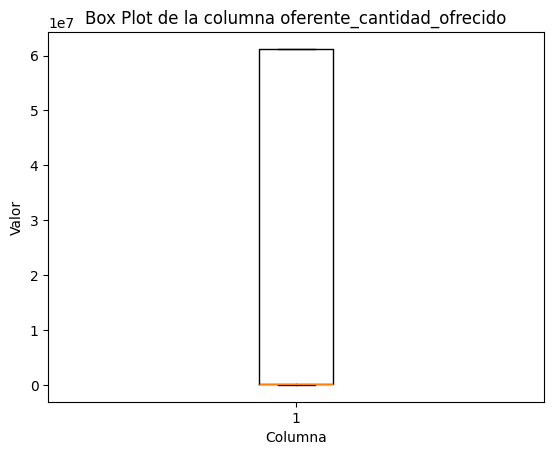

In [338]:
import matplotlib.pyplot as plt

def boxplot(dataframe, column_number):
  plt.boxplot(dataframe.iloc[column_number])
  plt.xlabel('Columna')
  plt.ylabel('Valor')
  plt.title('Box Plot de la columna ' + str(dataframe.columns[column_number]))


boxplot(compras_resto_df, 0)

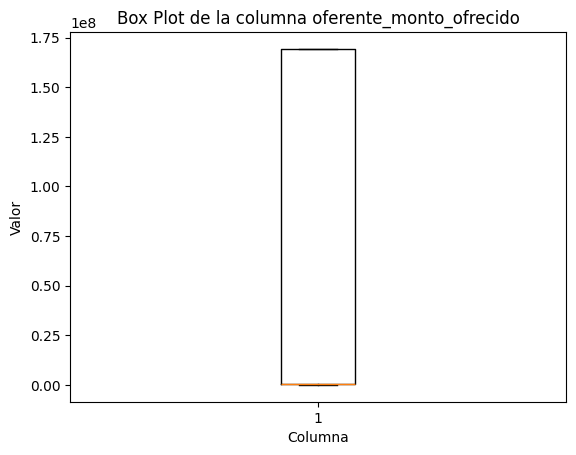

In [339]:
boxplot(compras_resto_df, 1)

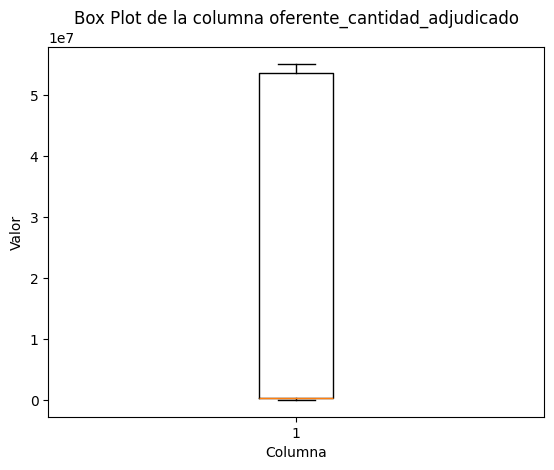

In [341]:
boxplot(compras_resto_df, 3)

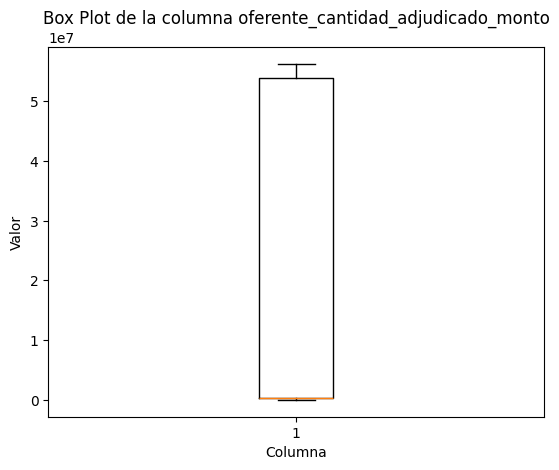

In [342]:
boxplot(compras_resto_df, 4)

Vemos que no se presentan valores fuera de rango, por lo que podemos pasar a escalar los atributos. Esta vez al no tener que lidiar con valores fuera de rango podemos utilizar StandardScaler o MinMax, pero optaremos por este último ya que se adapta bien tanto a K-Means como a los algoritmos de clustering jerárquico.

In [346]:
print("Antes del escalado con MinMaxScaler:")
compras_resto_df.describe()

Antes del escalado con MinMaxScaler:


,oferente_cantidad_ofrecido,oferente_monto_ofrecido,adjudicataria,oferente_cantidad_adjudicado,oferente_cantidad_adjudicado_monto
count,7.600000e+02,7.600000e+02,760.000000,7.600000e+02,7.600000e+02
mean,6.579020e+11,3.758779e+07,0.230263,1.275539e+05,1.306998e+07
std,1.813709e+13,5.384508e+07,0.421278,3.657043e+05,4.086238e+07
min,1.000000e+00,1.000000e-01,0.000000,0.000000e+00,0.000000e+00
25%,1.500000e+05,9.944188e+06,0.000000,0.000000e+00,0.000000e+00
50%,2.550000e+05,1.999200e+07,0.000000,0.000000e+00,0.000000e+00
75%,5.250000e+05,4.718625e+07,0.000000,0.000000e+00,0.000000e+00
max,5.000051e+14,7.680000e+08,1.000000,3.500000e+06,5.760000e+08


In [347]:
from sklearn.preprocessing import MinMaxScaler

compras_resto_df.iloc[:, [0,1,3,4]] = MinMaxScaler().fit_transform(compras_resto_df.iloc[:, [0,1,3,4]])

print("Luego del escalado con MinMaxScaler:")
compras_resto_df.describe()

Luego del escalado con MinMaxScaler:


<ipython-input-347-cbe9cdbc414e>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3.39994552e-10 6.79991104e-10 3.39994552e-10 6.79991104e-10
 6.79991104e-10 6.79991104e-10 6.79991104e-10 6.79991104e-10
 6.79991104e-10 6.79991104e-10 6.79991104e-10 6.79991104e-10
 6.79991104e-10 6.79991104e-10 6.79991104e-10 6.79991104e-10
 6.79991104e-10 6.79991104e-10 6.79991104e-10 0.00000000e+00
 6.79991104e-10 3.39994552e-10 6.79991104e-10 1.01998766e-09
 0.00000000e+00 1.01998766e-09 2.03997731e-09 1.01998766e-09
 3.39996352e-09 0.00000000e+00 3.39994552e-10 0.00000000e+00
 6.79991104e-10 1.01998766e-09 3.39994552e-10 1.01998766e-09
 3.39994552e-10 6.79991104e-10 3.39996352e-09 3.39994552e-10
 6.79991104e-10 3.39994552e-10 3.39994552e-10 6.79991104e-10
 3.39994552e-10 6.79991104e-10 6.79991104e-10 3.39994552e-10
 3.39994552e-10 0.00000000e+00 3.39996352e-09 3.39994552e-10
 1.69996276e-10 3.39996352e-09 1.69996276e-10 3.39994

,oferente_cantidad_ofrecido,oferente_monto_ofrecido,adjudicataria,oferente_cantidad_adjudicado,oferente_cantidad_adjudicado_monto
count,7.600000e+02,760.000000,760.000000,760.000000,760.000000
mean,1.315791e-03,0.048942,0.230263,0.036444,0.022691
std,3.627381e-02,0.070111,0.421278,0.104487,0.070942
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.999950e-10,0.012948,0.000000,0.000000,0.000000
50%,5.099928e-10,0.026031,0.000000,0.000000,0.000000
75%,1.049987e-09,0.061440,0.000000,0.000000,0.000000
max,1.000000e+00,1.000000,1.000000,1.000000,1.000000


Finalmente podemos aplicar los algoritmos de clustering.

Empecemos con K-means:

Para esto lo primero que tenemos que hacer es determinar el valor de K. En este caso utilizamos el elbow method o método del codo:

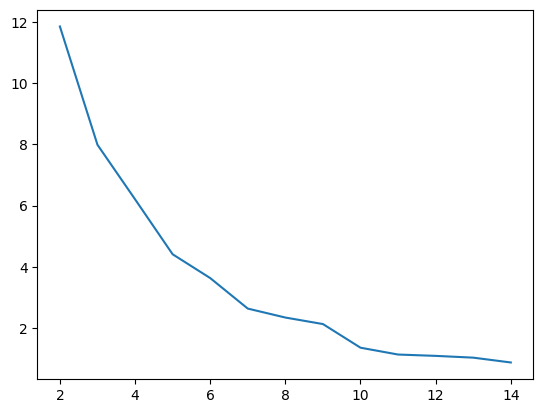

In [363]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

clusters = []
inertias = []
k_values = range(2, 15)

for k in k_values:
  c = KMeans(n_clusters=k, random_state=7)
  c.fit(compras_resto_df)
  clusters.append(c)
  inertias.append(c.inertia_)

plt.plot(k_values, inertias)

Segpun este método, el valor de K óptimo es aquel en el cual la inercia comienza a disminuir linealmente. En este caso tomamos K=7, elegimos el cluster correspondiente y ejecutamos el algoritmo sobre el dataframe:

In [364]:
cluster_of_compras = clusters[5]
print("Número de agrupamientos en el clúster:", cluster_of_compras.n_clusters)

Número de agrupamientos en el clúster: 7


In [365]:
c_clusters = cluster_of_compras.predict(compras_resto_df)
c_clusters

array([0, 3, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 5, 1, 1, 1, 0, 1, 1, 1, 1, 0, 5, 5, 5, 0, 5, 5,
       5, 3, 5, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 0, 1, 5, 1, 1, 1, 0, 1, 1,
       5, 1, 0, 1, 1, 1, 0, 0, 0, 5, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 2, 1, 1, 3, 0, 0, 0, 5, 0, 5, 3, 3, 5, 5, 1, 2, 1, 1,
       1, 1, 1, 5, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 5, 1, 1, 1, 5, 0, 0, 1, 1, 1, 0, 1,
       1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 3, 3, 0, 3,
       3, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 5, 1, 5, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 0,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 0, 5, 1, 1, 1, 1, 1, 1, 5, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 5, 0, 3, 3, 3, 3, 3, 1, 2, 1, 1,

A modo demostrativo graficaremos el scatter plot en dos dimensiones utilizando la cantidad de producto ofrecida y el atributo binario "adjudicataria" que indica si la oferta fue adjudicada o no.

[]

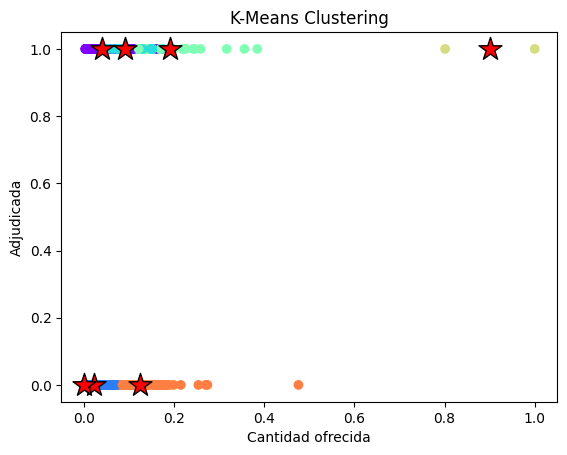

In [371]:
plt.figure()

# Visualizamos los patrones...
plt.scatter(compras_resto_df.iloc[:,1], compras_resto_df.iloc[:,2], c=c_clusters, cmap='rainbow')

# Visualizamos los centroides...
plt.scatter(
    cluster_of_compras.cluster_centers_[:, 1],
    cluster_of_compras.cluster_centers_[:, 2],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.title("K-Means Clustering")
plt.xlabel("Cantidad ofrecida")
plt.ylabel("Adjudicada")
plt.plot()

A pesar de que son muchas las dimensiones, de este gráfico lo que podemos inferir es que todas aquellas ofertas que superan el 50% de la máxima (que son minoría y por mucho) fueron adjudicadas, mientras que las que se encuentran por debajo de este umbral se encuentran bastante parejas en cuanto a adjudicadas y rechazadas (por lo menos en cantidad de clusters).

A continuación probemos una técnica de clustering aglomerativo:

Inicialmente se probará con una estrategia de distancia promedio para ver como se comporta. Considerando que contamos con pocos atributos escalados con MinMax y no hay presencia de valores fuera de rango no debería tener un mal desempeño.

In [373]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(linkage='average')

Definimos la métrica de distancia. De vuelta pensando en los atributos escalados y la ausencia de valores fuera de rango, en esta ocasión la distancia euclideana debería funcionar muy bien.

In [374]:
from scipy.spatial.distance import cdist

euclidean_distance_matrix = cdist(compras_resto_df, compras_resto_df, metric='euclidean')

Pasamos a ejecutar el algoritmo:

In [375]:
clustering.fit(euclidean_distance_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:586: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


AgglomerativeClustering(linkage='average')

Y finalmente graficamos el dendrograma para observar el proceso de aglomeración:

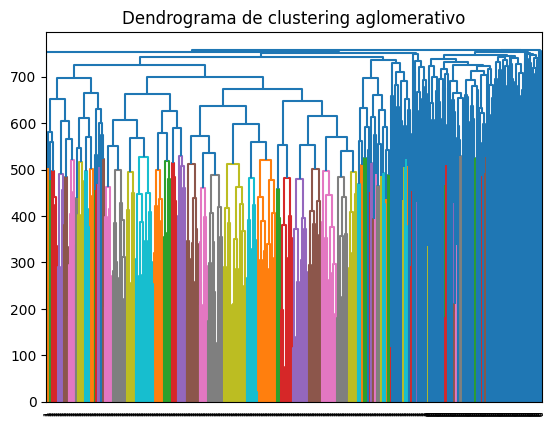

In [378]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
'''
Esta función se obtuvo del siguiente repositorio de scikit-learn:
https://github.com/scikit-learn/scikit-learn/blob/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py
'''
def plotDendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.title("Dendrograma de clustering aglomerativo")
plotDendrogram(clustering, labels=clustering.labels_)
plt.show()

Podemos apreciar que, acorde al algoritmo de aglomeración, comenzamos con un cluster por cada una de las 700 muestras y terminamos con un solo cluster que incluye todo el dataset.